# HHV model run

### Import the relevant libraries

In [1]:
# we must import the libraries once again since we haven't imported them in this file
import numpy as np
import tensorflow as tf
import statsmodels.api as sm
import seaborn as sns
sns.set()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Data

In [2]:
# let's create a temporary variable npz, where we will store each of the three Audiobooks datasets
npz = np.load('bio11.npz')

# we extract the inputs using the keyword under which we saved them
# to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(np.float)
# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = npz['targets'].astype(np.float)

# we load the validation data in the temporary variable
npz = np.load('bio21.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.float)

# we load the test data in the temporary variable
npz = np.load('bio31.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.float)

### Model
Outline, optimizers, loss, early stopping and training

In [106]:
# Set the input and output sizes
input_size = 3
output_size = 1
# Use same hidden layer size for both hidden layers. Not a must.
hidden_layer_size = 3
    
# define how the model will look like
model = tf.keras.Sequential([
   
    tf.keras.layers.Dense(hidden_layer_size,'tanh'),
    tf.keras.layers.Dense(hidden_layer_size,'sigmoid'),

    tf.keras.layers.Dense(output_size,'linear') # output layer
])


# Choose the optimizer and the loss function
# and the metrics we are interested in obtaining at each iteration

optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

model.compile(optimizer, loss='MAE')

# Training
# That's where we train the model we have built.

# set the batch size
batch_size = 32

# set a maximum number of training epochs
max_epochs = 2000

# set an early stopping mechanism

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=150,restore_best_weights=True)

# fit the model

model.fit(train_inputs, 
          train_targets, 
          batch_size=batch_size,
          epochs=max_epochs,
          callbacks= [early_stopping],
          validation_data=(validation_inputs, validation_targets), 
          verbose = 2 # making sure we get enough information about the training process
          )  

Train on 343 samples, validate on 73 samples
Epoch 1/2000
343/343 - 7s - loss: 0.2464 - val_loss: 0.2168
Epoch 2/2000
343/343 - 0s - loss: 0.2186 - val_loss: 0.1909
Epoch 3/2000
343/343 - 0s - loss: 0.1929 - val_loss: 0.1654
Epoch 4/2000
343/343 - 0s - loss: 0.1685 - val_loss: 0.1410
Epoch 5/2000
343/343 - 0s - loss: 0.1454 - val_loss: 0.1202
Epoch 6/2000
343/343 - 0s - loss: 0.1249 - val_loss: 0.1013
Epoch 7/2000
343/343 - 0s - loss: 0.1067 - val_loss: 0.0865
Epoch 8/2000
343/343 - 0s - loss: 0.0938 - val_loss: 0.0762
Epoch 9/2000
343/343 - 0s - loss: 0.0855 - val_loss: 0.0776
Epoch 10/2000
343/343 - 0s - loss: 0.0864 - val_loss: 0.0850
Epoch 11/2000
343/343 - 0s - loss: 0.0910 - val_loss: 0.0901
Epoch 12/2000
343/343 - 0s - loss: 0.0947 - val_loss: 0.0923
Epoch 13/2000
343/343 - 0s - loss: 0.0960 - val_loss: 0.0915
Epoch 14/2000
343/343 - 0s - loss: 0.0948 - val_loss: 0.0881
Epoch 15/2000
343/343 - 0s - loss: 0.0917 - val_loss: 0.0837
Epoch 16/2000
343/343 - 0s - loss: 0.0878 - val_l

343/343 - 0s - loss: 0.0345 - val_loss: 0.0270
Epoch 135/2000
343/343 - 0s - loss: 0.0342 - val_loss: 0.0268
Epoch 136/2000
343/343 - 0s - loss: 0.0341 - val_loss: 0.0267
Epoch 137/2000
343/343 - 0s - loss: 0.0339 - val_loss: 0.0268
Epoch 138/2000
343/343 - 0s - loss: 0.0338 - val_loss: 0.0268
Epoch 139/2000
343/343 - 0s - loss: 0.0337 - val_loss: 0.0266
Epoch 140/2000
343/343 - 0s - loss: 0.0335 - val_loss: 0.0264
Epoch 141/2000
343/343 - 0s - loss: 0.0334 - val_loss: 0.0262
Epoch 142/2000
343/343 - 0s - loss: 0.0332 - val_loss: 0.0262
Epoch 143/2000
343/343 - 0s - loss: 0.0331 - val_loss: 0.0259
Epoch 144/2000
343/343 - 0s - loss: 0.0330 - val_loss: 0.0257
Epoch 145/2000
343/343 - 0s - loss: 0.0329 - val_loss: 0.0257
Epoch 146/2000
343/343 - 0s - loss: 0.0327 - val_loss: 0.0259
Epoch 147/2000
343/343 - 0s - loss: 0.0327 - val_loss: 0.0258
Epoch 148/2000
343/343 - 0s - loss: 0.0325 - val_loss: 0.0257
Epoch 149/2000
343/343 - 0s - loss: 0.0325 - val_loss: 0.0257
Epoch 150/2000
343/343 

Epoch 267/2000
343/343 - 0s - loss: 0.0217 - val_loss: 0.0252
Epoch 268/2000
343/343 - 0s - loss: 0.0217 - val_loss: 0.0252
Epoch 269/2000
343/343 - 0s - loss: 0.0216 - val_loss: 0.0251
Epoch 270/2000
343/343 - 0s - loss: 0.0216 - val_loss: 0.0249
Epoch 271/2000
343/343 - 0s - loss: 0.0216 - val_loss: 0.0249
Epoch 272/2000
343/343 - 0s - loss: 0.0218 - val_loss: 0.0250
Epoch 273/2000
343/343 - 0s - loss: 0.0216 - val_loss: 0.0249
Epoch 274/2000
343/343 - 0s - loss: 0.0216 - val_loss: 0.0251
Epoch 275/2000
343/343 - 0s - loss: 0.0215 - val_loss: 0.0255
Epoch 276/2000
343/343 - 0s - loss: 0.0217 - val_loss: 0.0255
Epoch 277/2000
343/343 - 0s - loss: 0.0215 - val_loss: 0.0256
Epoch 278/2000
343/343 - 0s - loss: 0.0215 - val_loss: 0.0255
Epoch 279/2000
343/343 - 0s - loss: 0.0217 - val_loss: 0.0253
Epoch 280/2000
343/343 - 0s - loss: 0.0215 - val_loss: 0.0254
Epoch 281/2000
343/343 - 0s - loss: 0.0215 - val_loss: 0.0252
Epoch 282/2000
343/343 - 0s - loss: 0.0215 - val_loss: 0.0252
Epoch 28

In [107]:
# import pandas as pd
# a1=model.layers[0].get_weights()
# w1,b1= a1
# a2=model.layers[1].get_weights()
# w2,b2= a2

# w1= pd.DataFrame(data=w1)
# b1= pd.DataFrame(data=b1)
# w2= pd.DataFrame(data=w2)
# b2=pd.DataFrame(data=b2)

# # w1.to_excel('weight1')
# # b1.to_excel('bias1')
# # w2.to_excel('weight2')
# # b2.to_excel('bias2')
# model.layers[2].get_weights()
# b2.to_excel (r'C:\Users\mady\Desktop\b2.xlsx', index = False, header=True)

### Model Evaluation

In [117]:
model.evaluate(validation_inputs,validation_targets)

73/73 [==============================] - 1s 20ms/sample - loss: 0.0176


0.01759883052069847

In [118]:
model.evaluate(test_inputs,test_targets)*42.38

74/74 [==============================] - 0s 1ms/sample - loss: 0.0192


0.8145507912065936

# train data evaluation

In [119]:
train_outputs=np.squeeze(model.predict_on_batch(train_inputs)).round(2)
train_outputs

array([0.1 , 0.32, 0.37, 0.29, 0.31, 0.29, 0.34, 0.24, 0.32, 0.36, 0.37,
       0.35, 0.49, 0.35, 0.29, 0.35, 0.38, 0.33, 0.42, 0.48, 0.36, 0.25,
       0.93, 0.28, 0.35, 0.35, 0.44, 0.31, 0.36, 0.15, 0.72, 0.37, 0.32,
       0.19, 0.92, 0.35, 0.35, 0.31, 0.33, 0.34, 0.35, 0.43, 0.33, 0.24,
       0.33, 0.23, 0.34, 0.35, 0.37, 0.36, 0.32, 0.63, 0.35, 0.92, 0.46,
       0.32, 0.17, 0.37, 0.17, 0.46, 0.27, 0.92, 0.48, 0.17, 0.35, 0.36,
       0.58, 0.31, 0.17, 0.35, 0.3 , 0.4 , 0.38, 0.32, 0.25, 0.46, 0.32,
       0.14, 0.49, 0.58, 0.38, 0.36, 0.39, 0.26, 0.35, 0.27, 0.47, 0.41,
       0.33, 0.33, 0.93, 0.62, 0.24, 0.36, 0.35, 0.36, 0.09, 0.33, 0.32,
       0.17, 0.26, 0.37, 0.37, 0.4 , 0.3 , 0.35, 0.36, 0.34, 0.32, 0.34,
       0.31, 0.32, 0.1 , 0.37, 0.16, 0.3 , 0.34, 0.28, 0.34, 0.34, 0.28,
       0.52, 0.27, 0.35, 0.31, 0.38, 0.41, 0.46, 0.34, 0.33, 0.43, 0.36,
       0.39, 0.92, 0.61, 0.41, 0.34, 0.35, 0.54, 0.34, 0.34, 0.34, 0.35,
       0.31, 0.26, 0.12, 0.38, 0.34, 0.56, 0.93, 0.

In [120]:
train_targets.round(2)

array([[0.1 ],
       [0.31],
       [0.36],
       [0.31],
       [0.35],
       [0.32],
       [0.37],
       [0.26],
       [0.31],
       [0.36],
       [0.37],
       [0.33],
       [0.54],
       [0.33],
       [0.28],
       [0.34],
       [0.41],
       [0.34],
       [0.39],
       [0.44],
       [0.33],
       [0.27],
       [0.99],
       [0.3 ],
       [0.35],
       [0.36],
       [0.43],
       [0.3 ],
       [0.34],
       [0.17],
       [0.71],
       [0.37],
       [0.34],
       [0.17],
       [1.  ],
       [0.35],
       [0.35],
       [0.37],
       [0.33],
       [0.33],
       [0.36],
       [0.45],
       [0.34],
       [0.26],
       [0.31],
       [0.22],
       [0.27],
       [0.27],
       [0.34],
       [0.33],
       [0.32],
       [0.62],
       [0.35],
       [0.92],
       [0.47],
       [0.32],
       [0.21],
       [0.38],
       [0.19],
       [0.44],
       [0.26],
       [1.  ],
       [0.44],
       [0.15],
       [0.35],
       [0.34],
       [0.

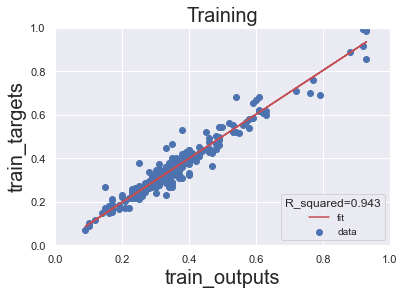

In [121]:
import matplotlib.pyplot as plt
plt.scatter(train_outputs,train_targets,label='data')
x= train_outputs
y=train_targets
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,'r',label='fit')
plt.legend(loc='lower right',title='R_squared=0.943',fontsize=10)
plt.title('Training',fontsize=20)
plt.xlabel('train_outputs',fontsize=20)
plt.ylabel('train_targets',fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [122]:
b = train_targets
a1 = train_outputs
a = sm.add_constant(a1)
results = sm.OLS(b,a).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     6144.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          3.54e-220
Time:                        05:53:13   Log-Likelihood:                 694.44
No. Observations:                 343   AIC:                            -1385.
Df Residuals:                     341   BIC:                            -1377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0045      0.005     -0.902      0.368      -0.014       0.005
x1             1.0109      0.013     78.385      0.000       0.986       1.036
==============================================================================
Omnibus:                       78.805   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.287
Skew:                           0.890   Prob(JB):                     1.93e-77
Kurtosis:                       7.642   Cond. No.                         8.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Test data evaluation

In [123]:
test_outputs=np.squeeze(model.predict_on_batch(test_inputs)).round(2)
test_outputs

array([0.21, 0.25, 0.29, 0.66, 0.29, 0.5 , 0.34, 0.36, 0.36, 0.46, 0.5 ,
       0.27, 0.15, 0.92, 0.2 , 0.37, 0.29, 0.3 , 0.36, 0.36, 0.23, 0.42,
       0.35, 0.39, 0.53, 0.32, 0.17, 0.38, 0.34, 0.29, 0.38, 0.35, 0.28,
       0.34, 0.55, 0.37, 0.34, 0.11, 0.16, 0.35, 0.36, 0.26, 0.5 , 0.25,
       0.37, 0.41, 0.23, 0.2 , 0.21, 0.45, 0.32, 0.21, 0.35, 0.34, 0.32,
       0.53, 0.27, 0.11, 0.38, 0.49, 0.38, 0.38, 0.65, 0.4 , 0.35, 0.35,
       0.03, 0.21, 0.2 , 0.24, 0.34, 0.34, 0.36, 0.31], dtype=float32)

In [124]:
test_targets.round(2)

array([[0.2 ],
       [0.28],
       [0.27],
       [0.65],
       [0.28],
       [0.49],
       [0.34],
       [0.38],
       [0.29],
       [0.34],
       [0.5 ],
       [0.27],
       [0.14],
       [0.86],
       [0.16],
       [0.37],
       [0.28],
       [0.3 ],
       [0.41],
       [0.36],
       [0.22],
       [0.42],
       [0.32],
       [0.42],
       [0.47],
       [0.32],
       [0.14],
       [0.33],
       [0.36],
       [0.32],
       [0.37],
       [0.34],
       [0.27],
       [0.32],
       [0.54],
       [0.36],
       [0.31],
       [0.11],
       [0.16],
       [0.35],
       [0.33],
       [0.24],
       [0.53],
       [0.25],
       [0.36],
       [0.41],
       [0.22],
       [0.2 ],
       [0.23],
       [0.47],
       [0.3 ],
       [0.23],
       [0.35],
       [0.34],
       [0.32],
       [0.53],
       [0.25],
       [0.07],
       [0.45],
       [0.47],
       [0.38],
       [0.36],
       [0.59],
       [0.4 ],
       [0.35],
       [0.34],
       [0.

## Mean Absolute Error/ percent error

In [125]:
a=model.evaluate(test_inputs,test_targets)*42.38
b=a
f'mean absolute error = {b}Mj/kg',f'error percentage = {(b/19.3)*100}%'

74/74 [==============================] - 0s 595us/sample - loss: 0.0192


('mean absolute error = 0.8145507912065936Mj/kg',
 'error percentage = 4.220470420759552%')

In [126]:
p=[]
for i in range(len(test_inputs)):
    a=abs(test_outputs[i]-test_targets[i])
    p.append(a)
print(max(p),min(p))

[0.12422842] [0.00016518]


In [127]:
p=[]
for i in range(len(train_inputs)):
    a=abs(train_outputs[i]-train_targets[i])
    p.append(a)
print(max(p),min(p))

[0.15091081] [1.41623899e-05]


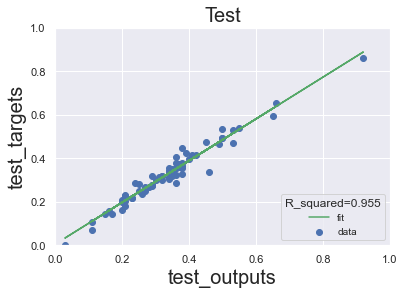

In [128]:
import matplotlib.pyplot as plt
plt.scatter(test_outputs,test_targets,label='data')
x= test_outputs
y=test_targets
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,'g',label='fit')
plt.legend(loc='lower right',title='R_squared=0.955',fontsize=10)
plt.title('Test',fontsize=20)
plt.xlabel('test_outputs',fontsize=20)
plt.ylabel('test_targets',fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)

plt.show()

In [129]:
y = test_targets
x1 = test_outputs
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1570.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.24e-50
Time:                        05:53:30   Log-Likelihood:                 161.07
No. Observations:                  74   AIC:                            -318.1
Df Residuals:                      72   BIC:                            -313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050      0.009      0.559      0.578      -0.013       0.023
x1             0.9604      0.024     39.620      0.000       0.912       1.009
==============================================================================
Omnibus:                       15.016   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               34.989
Skew:                          -0.570   Prob(JB):                     2.53e-08
Kurtosis:                       6.170   Cond. No.                         8.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Saving the model

In [103]:
model.save('HHV_model_1.h5') 

### Retrieving the model

In [3]:
model = tf.keras.models.load_model('HHV_model_1.h5')

In [4]:
import joblib
trans1=joblib.load('f3')
trans2=joblib.load('f4')

### Model deployment

In [7]:
C=float(input('enter your carbon percentage%:>>>'))
H=float(input('enter your Hydrogen percentage%:>>>'))
O=float(input('enter your oxygen percentage%:>>>'))
N=float(input('enter your nitrogen percentage%:>>>'))
S=float(input('enter your sulfur percentage%:>>>'))
A=float(input('enter your ash percentage%:>>>'))
VM=float(input('enter your volatile matter percentage%:>>>'))
FC=float(input('enter your fixed carbon percentage%:>>>'))
d=int(input('choose your biomass type\n1-marinebiomass(algae)\n2-RDF&MSW\n3-biochar\n4-grass/plant\n5-husk/shell/pit\n6-manure\n7-non organic residue/product\n8-organic residue\n9-others\n10-sludge\n11-straw\n12-torrefied material\n :>>>'))



x3= [C,H,O,N,S,A,VM,FC,0,0,0,0,0,0,0,0,0,0,0,0]
x3[7+d]=1

a=np.array([x3,
           ])

x= trans1.transform(a)

y=model.predict(x)
real_y= trans2.inverse_transform(y)


print(f'your Heating value in Mj/kg equals{real_y}')

enter your carbon percentage%:>>>33
enter your Hydrogen percentage%:>>>33
enter your oxygen percentage%:>>>20
enter your nitrogen percentage%:>>>1
enter your sulfur percentage%:>>>1
enter your ash percentage%:>>>30
enter your volatile matter percentage%:>>>33
enter your fixed carbon percentage%:>>>20
choose your biomass type
1-marinebiomass(algae)
2-RDF&MSW
3-biochar
4-grass/plant
5-husk/shell/pit
6-manure
7-non organic residue/product
8-organic residue
9-others
10-sludge
11-straw
12-torrefied material
 :>>>12
your Heating value in Mj/kg equals[[22.87985]]


### Significance test for neural networks
### Partial derivative test

#### In order to evaluate the most important inputs affecting HHV of biomass, I calculated the partial derivative of the output with respect to each single input over the training dataset

In [9]:
list1= ['C','H','O','N','S','A','VM','FC']
w=[]
b={}
inp=train_inputs
inp = tf.Variable(inp, dtype=tf.float32)

with tf.GradientTape() as tape:
    preds = model(inp)
grads = np.squeeze(tape.gradient(preds, inp))

for i in range(8):
    a=sum((grads[:,i])**2)/(train_inputs.shape[0])
    w.append(a.round(5))
for i in range(8):
    b[list1[i]]=w[i]
print(b)

{'C': 0.29566, 'H': 0.17263, 'O': 0.00442, 'N': 0.01439, 'S': 0.00468, 'A': 0.04672, 'VM': 0.00234, 'FC': 0.01543}


In [10]:
t=[]
for i in w:
    t.append((i/sum(w)).round(3))
print(t)

[0.532, 0.31, 0.008, 0.026, 0.008, 0.084, 0.004, 0.028]


[Text(0.5, 0, 'variables'), Text(0, 0.5, 'sensitivity')]

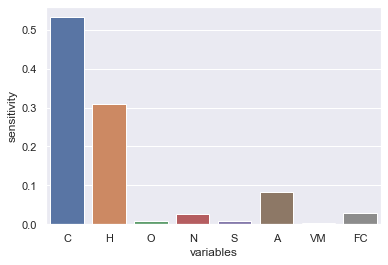

In [12]:
import seaborn as sns
sns.set()
sns.barplot(x=list1,y=t).set(xlabel='variables',ylabel='sensitivity')